<a href="https://colab.research.google.com/github/genarovannucci/Dark-Quest-data-science/blob/main/Copy_of_Dark_Quest_Jupyter(last).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🦄🎲Dark Quest Data Science Project🧙‍♂️⚔️

Este es un proyecto de investigación y game-design que busca encontrar errores y oportunidades de mejora al juego en desarrollo "Dark Quest", uno de mis emprendimientos y productos lúdicos que planeo monetizar eventualmente.

El reto es realizar un proyecto de ciencia de datos completo y aplicado a los negocios, con estadística y argumentos que fundamenten los hallazgos en pro de tomar mejores desiciones de desarrollo de producto y de negocios

Las fases a realizar serán:

    1 Definición del problema

    2 Recopilación de datos

    3 Limpieza de datos

    4 Ingeniería de características

    5 Exploración y análisis de datos (EDA)

    6 Construcción del modelo

    7 Evaluación y validación del modelo

    8 Implementación y despliegue

    9 Monitoreo y mantenimiento

    10 Comunicación y presentación de resultados




---
## 🧹 Data Import, Cleaning & Feature Engineering
---


In [ ]:
"""
Este script carga un archivo CSV con datos de clases de personajes,
realiza la limpieza y transformaciones necesarias, y guarda un
nuevo archivo CSV limpio.
"""
# --------------------
# 1. CONFIGURACIÓN E IMPORTACIONES
# --------------------
import pandas as pd
import numpy as np # útil para operaciones numéricas si es necesario
import re # Para expresiones regulares, útil para extraer números de dados

# Mensaje de bienvenida
print("Iniciando script de limpieza de datos...")

# --------------------
# 2. CARGAR LOS DATOS
# --------------------
# --- Opción A: Subir el archivo directamente a Colab ---
# 1. Ejecuta esta celda.
# 2. Haz clic en "Choose Files" y selecciona tu archivo 'clases_sucio.csv'.
# 3. El archivo estará disponible temporalmente en Colab.
from google.colab import files
print("Por favor, sube tu archivo 'clases_sucio.csv'")
uploaded = files.upload()
# # Obtener el nombre del archivo subido (asume que solo subiste uno)
input_csv_filename = list(uploaded.keys())[0]
print(f"Archivo '{input_csv_filename}' cargado.")

# --- Opción B: Montar Google Drive ---
# 1. Ejecuta esta celda.
# 2. Sigue el enlace, autoriza el acceso a tu Google Drive.
# 3. Copia el código de autorización y pégalo en la celda.
# 4. Asegúrate de que tu archivo 'clases_sucio.csv' esté en la ruta correcta en tu Drive.
# from google.colab import drive
# drive.mount('/content/drive')
# # Ajusta esta ruta a donde guardaste tu archivo CSV en Google Drive
# input_csv_path = '/content/drive/MyDrive/ruta/a/tu/carpeta/clases_sucio.csv' # ¡¡¡MODIFICA ESTA RUTA!!!
# print(f"Accediendo al archivo desde Google Drive: {input_csv_path}")
# input_csv_filename = input_csv_path # Usa la ruta completa

# --- Leer el archivo CSV ---
# Ajusta los parámetros según cómo esté exactamente tu CSV.
# Por ejemplo, si la primera fila son los encabezados correctos: header=0
# Si los encabezados están en la segunda fila: header=1
# Si usaste comas como separador: sep=','
# Si usaste punto y coma: sep=';'
try:
    # Asumimos que la primera fila contiene los encabezados
    # y que el separador es coma. ¡AJUSTA SI ES NECESARIO!
    df = pd.read_csv(input_csv_filename, sep=',')
    print("Archivo CSV cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta especificada: {input_csv_filename}")
    print("Verifica la ruta o el método de carga (Subida directa o Google Drive).")
    # Detiene la ejecución si no se carga el archivo
    raise SystemExit("Deteniendo ejecución por error de carga.")
except Exception as e:
    print(f"Ocurrió un error inesperado al cargar el CSV: {e}")
    raise SystemExit("Deteniendo ejecución por error de carga.")


# --------------------
# 3. INSPECCIÓN INICIAL
# --------------------
print("\n--- Inspección Inicial de los Datos ---")
print("Primeras 12 filas:")
print(df.head(12))
print("\nInformación del DataFrame (tipos de datos, no nulos):")
df.info()
print("\nNombres actuales de las columnas:")
print(df.columns)
# --------------------
# 4. LIMPIEZA Y TRANSFORMACIÓN
# --------------------
print("\n--- Iniciando Limpieza y Transformación ---")

# --- 4.1 Renombrar Columnas ---
# Crear nombres de columna más amigables para Python (minúsculas, guiones bajos)
# ¡¡¡AJUSTA ESTOS NOMBRES SEGÚN LAS COLUMNAS REALES DE TU CSV!!!
column_mapping = {
    'class': 'character_class', # Si tu primera columna se llama 'clase'
    'level': 'level',
    'con': 'constitution',
    'str': 'strength',
    'dex': 'dexterity',
    'int': 'intelligence',
    'wis': 'wisdom',
    'cha': 'charisma',
    'total': 'attribute_balance_coefficent', # Renombramos para recalcular luego
    'max hp': 'max_hp',
    'ac': 'ac',
    'ac (no shield)': 'ac_no_shield',
    'att.bonus': 'attack_bonus',
    'to hit ac 7': 'to_hit_ac_7_pct', # Renombramos para indicar que es %
    'dmg main hand': 'dmg_main_hand_dice', # Renombramos para indicar que es dado
    'dmg two hands': 'dmg_two_hands_dice'  # Renombramos para indicar que es dado
    # Añade o quita mapeos según sea necesario
}

# Aplicar el renombrado (solo si las columnas existen en el df)
# Creamos un mapeo solo con las columnas que SÍ existen en el DataFrame original
columns_to_rename = {old: new for old, new in column_mapping.items() if old in df.columns}
if columns_to_rename:
   df.rename(columns=columns_to_rename, inplace=True)
   print("\nColumnas renombradas:")
   print(df.columns)
else:
    print("\nNo se renombraron columnas (verifica los nombres originales en column_mapping).")


# --- 4.2 Limpiar Columna de Porcentaje ('to_hit_ac_7_pct') ---
if 'to_hit_ac_7_pct' in df.columns:
    print("\nLimpiando columna 'to_hit_ac_7_pct'...")
    # 1. Quitar el símbolo '%' y convertir a número
    df['to_hit_ac_7_pct'] = pd.to_numeric(df['to_hit_ac_7_pct'].str.replace('%', ''), errors='coerce')
    # 2. Dividir por 100 para convertir a decimal
    df['to_hit_ac_7_pct'] = df['to_hit_ac_7_pct'] / 100.0
    # 3. Formatear a dos decimales (opcional, pero recomendado para visualización)
    df['to_hit_ac_7_pct'] = df['to_hit_ac_7_pct'].map(lambda x: '{:.2f}'.format(x))
    print("Columna 'to_hit_ac_7_pct' modificada a formato decimal.")
    print(df['to_hit_ac_7_pct'].head())
else:
    print("\nAdvertencia: Columna 'to_hit_ac_7_pct' no encontrada para limpiar.")


# --- 4.3 Procesar Columnas de Daño (Notación de Dados) ---
print("\nProcesando columnas de daño (dados)...")

# Función para extraer el número de caras de una notación como 'd6', 'd10'
def get_dice_faces(dice_notation):
    if isinstance(dice_notation, str):
        match = re.match(r'd(\d+)', dice_notation.strip(), re.IGNORECASE)
        if match:
            return int(match.group(1))
    return None # Retorna None si no es string o no coincide el formato

# Función para calcular daño promedio
def calculate_average_damage(faces):
    if faces is not None and faces > 0:
        return (1 + faces) / 2.0
    return np.nan # Retorna NaN si no se pudo calcular


# Aplicar a la columna de daño principal
if 'dmg_main_hand_dice' in df.columns:
    faces_main = df['dmg_main_hand_dice'].apply(get_dice_faces)
    df['avg_dmg_main_hand'] = faces_main.apply(calculate_average_damage)
    print("Columnas de daño promedio creadas para 'main_hand'.")
    print(df[['dmg_main_hand_dice', 'avg_dmg_main_hand']].head())
else:
    print("Advertencia: Columna 'dmg_main_hand_dice' no encontrada.")

# Aplicar a la columna de daño a dos manos
if 'dmg_two_hands_dice' in df.columns:
    faces_two_hands = df['dmg_two_hands_dice'].apply(get_dice_faces)
    df['avg_dmg_two_hands'] = faces_two_hands.apply(calculate_average_damage)
    print("Columnas de daño promedio creadas para 'two_hands'.")
    print(df[['dmg_two_hands_dice', 'avg_dmg_two_hands']].head())
else:
    print("Advertencia: Columna 'dmg_two_hands_dice' no encontrada.")

# --- 4.4 Verificar/Recalcular 'total_stats' ---
# Lista de columnas de atributos (asegúrate que los nombres coincidan después de renombrar)
attribute_columns = ['constitution', 'strength', 'dexterity', 'intelligence', 'wisdom', 'charisma']



# --- 4.5 Convertir columnas de 'ac' a int (versión comprimida)
df[['ac', 'ac_no_shield']] = df[['ac', 'ac_no_shield']].astype(int)



# --- 4.6 Revisar Tipos de Datos Finales ---
print("\n--- Tipos de Datos Después de la Limpieza ---")
df.info()

# --- 4.7 (Opcional) Manejar Valores Faltantes (NaN) ---
# Si en los pasos anteriores se generaron NaNs (ej. por datos de dados mal formateados)
# puedes decidir qué hacer: rellenarlos (fillna), eliminarlos (dropna), etc.
# print("\nBuscando valores faltantes (NaN):")
# print(df.isnull().sum())
# Ejemplo: Rellenar daño promedio faltante con 0
# df['avg_dmg_main_hand'].fillna(0, inplace=True)

# --------------------
# 5. GUARDAR DATOS LIMPIOS
# --------------------
output_csv_filename = 'clases_limpio.csv'
# Si usaste Google Drive, guarda el archivo allí también
# output_csv_path = '/content/drive/MyDrive/ruta/a/tu/carpeta/clases_limpio.csv' # ¡¡MODIFICA ESTA RUTA!!

try:
    # Guardar sin el índice de pandas
    df.to_csv(output_csv_filename, index=False, encoding='utf-8')
    print(f"\n--- ¡Éxito! Datos limpios guardados en '{output_csv_filename}' ---")

    # Si usaste Drive, copia el archivo allí
    # import shutil
    # shutil.copy(output_csv_filename, output_csv_path)
    # print(f"Archivo copiado también a Google Drive: {output_csv_path}")

    # --- Opción para descargar directamente desde Colab (si no usas Drive) ---
    # files.download(output_csv_filename)
    # print(f"Descargando '{output_csv_filename}'...")

except Exception as e:
    print(f"\nError al guardar el archivo CSV limpio: {e}")


# --------------------
# 6. MOSTRAR DATAFRAME FINAL (OPCIONAL)
# --------------------
print("\n--- Vista Previa del DataFrame Limpio Final ---")
print(df.head())

Iniciando script de limpieza de datos...
Por favor, sube tu archivo 'clases_sucio.csv'


Saving clases_sucio.csv.csv to clases_sucio.csv (2).csv
Archivo 'clases_sucio.csv (2).csv' cargado.
Archivo CSV cargado exitosamente.

--- Inspección Inicial de los Datos ---
Primeras 12 filas:
         class  level  con  str  dex  int  wis  cha  total  max hp  ac  \
0   magic-user      1   -3   -1    2    3    0    0      3       7   8   
1        thief      1   -1   -1    3    1    0    0      3       9  11   
2       cleric      1    1    1   -1    0    2    0      3      11  10   
3      fighter      1    1    1    1    0    0    0      3      11  12   
4    barbarian      1    1    3   -2    0    0    0      3      11  10   
5       knight      1    3    1   -2    0    0    0      3      13  11   
6       hunter      1   -1    1    2    0    1    0      3       9  11   
7     deprived      1   -2    1    1    1    1    1      3       8   9   
8         bard      1   -1    1    1    0    0    2      3       9  10   
9     wanderer      1    0    1    2    0    0    0      3      10

---
## 📈🔭📊 Exploratory Data Anaylisis
---

In [ ]:
from google.colab import files
#Descomentando la siguiente linea, se podrá descargar el csv limpio
#files.download('clases_limpio.csv')

<ipython-input-17-862f2e6cec62>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-17-862f2e6cec62>:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Clase')


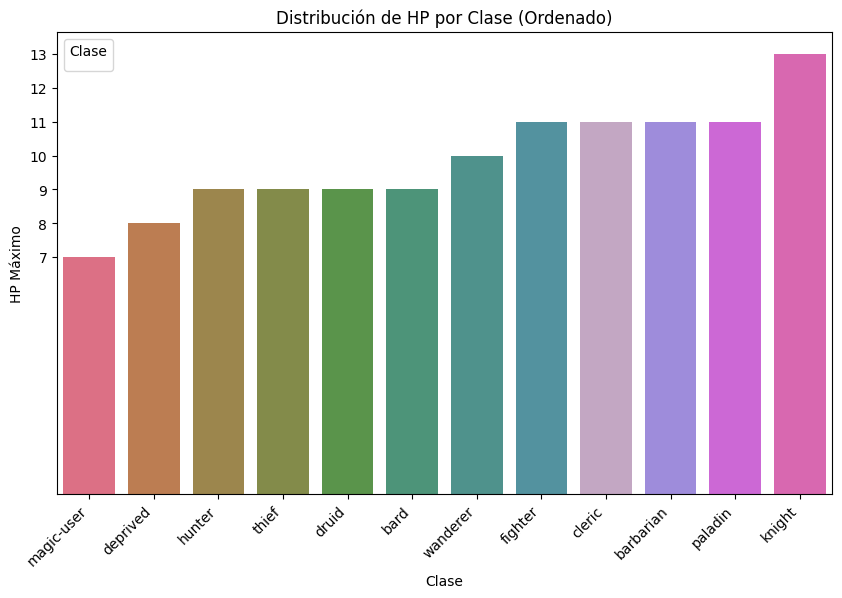

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Carga el dataset limpio
df = pd.read_csv('clases_limpio.csv')

# Convierte 'character_class' en una variable categórica
df['character_class'] = pd.Categorical(df['character_class'])

# Ordena el DataFrame por 'max_hp' de menor a mayor
df_sorted = df.sort_values(by='max_hp')

# Define colores para cada clase, comenzando desde lila
num_classes = len(df['character_class'].unique())
colors = sns.husl_palette(num_classes, s=.8, l=.6) # Paleta husl con saturación y luminosidad ajustadas

# Cambia el color de 'magic-user' a lila
magic_user_index = df_sorted['character_class'].cat.categories.tolist().index('magic-user')
colors[magic_user_index] = '#C8A2C8'  # Código de color hexadecimal para lila

# Crea el gráfico de barras, especificando el orden
plt.figure(figsize=(10, 6))
sns.barplot(
    x='character_class',
    y='max_hp',
    data=df_sorted,
    palette=colors,
    dodge=False,
    order=df_sorted['character_class'].unique()  # Especifica el orden de las clases
)
plt.title('Distribución de HP por Clase (Ordenado)')
plt.xlabel('Clase')
plt.ylabel('HP Máximo')
plt.xticks(rotation=45, ha='right')

# Ajusta el eje y para que muestre todos los valores enteros
plt.yticks(np.arange(int(df_sorted['max_hp'].min()), int(df_sorted['max_hp'].max()) + 1, 1))

plt.legend(title='Clase')
plt.show()


---
## 🧠 Model Building
---



Dark Quest usa un sistema de combate de los los 20's naturales en el d20 realizan doble daño, lo cual complejiza significativamente el analísis estadístico, por lo cual se optará por realizar simulaciones de montecarlo

Para optimizar los recursos computacionales y mantener los números lo más simples posibles, buscaremos un argumento estadístico que nos otortgue el número más eficiente de simulaciones para cada matchup

Para determinar un número óptimo de simulaciones, debemos considerar:

Margen de error deseado (ε): Utilizando la teoría del intervalo de confianza, podemos estimar que el margen de error es aproximadamente ε ≈ 1.96 × σ/√n, donde σ es la desviación estándar y n el número de simulaciones.
Ley de los grandes números: A medida que aumenta el número de simulaciones, la media muestral converge a la verdadera media.
Teorema del límite central: Con suficientes simulaciones, la distribución de la media muestral se aproxima a una distribución normal.




Este código te permitirá:

*Identificar las clases físicas según el criterio establecido
Determinar el número óptimo de simulaciones mediante un análisis de convergencia
*Simular todos los enfrentamientos posibles entre las clases físicas
*Visualizar los resultados en una matriz de calor que muestra las tasas de victoria

El análisis de convergencia es especialmente importante desde el punto de vista estadístico y de ciencias de la computación:

Desde la estadística: Buscamos el punto donde agregar más simulaciones no mejora significativamente la precisión (error estándar). Típicamente, esto ocurre cuando la variación entre simulaciones consecutivas es menor al 0.5%.
Desde ciencias de la computación: Optimizamos recursos computacionales identificando el mínimo número de simulaciones necesario para obtener resultados estadísticamente válidos. Esto aplica el principio de eficiencia computacional.

El sistema es perfecto para análisis Monte Carlo porque:

Tiene elementos aleatorios (tiradas de d20)
Incluye reglas especiales (críticos en 20)
Presenta múltiples variables (HP, CA, bonos de ataque, dados de daño)



In [ ]:
# Filtramos clases físicas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Cargar el dataset
df = pd.read_csv('clases_limpio.csv')

# Filtrar clases sin bonificaciones en atributos mentales
clases_fisicas = df[(df['intelligence'] <= 0) & (df['wisdom'] <= 0) & (df['charisma'] <= 0)]

print("Clases físicas identificadas:")
print(clases_fisicas[['character_class', 'strength', 'dexterity', 'constitution', 'intelligence', 'wisdom', 'charisma']])

Clases físicas identificadas:
  character_class  strength  dexterity  constitution  intelligence  wisdom  \
3         fighter         1          1             1             0       0   
4       barbarian         3         -2             1             0       0   
5          knight         1         -2             3             0       0   
9        wanderer         1          2             0             0       0   

   charisma  
3         0  
4         0  
5         0  
9         0  


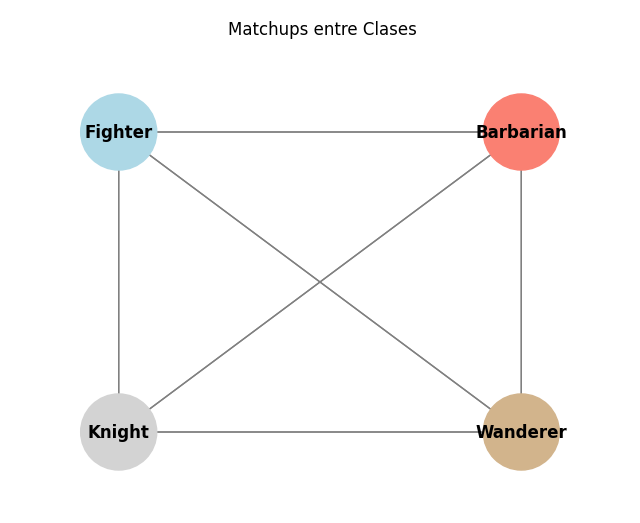

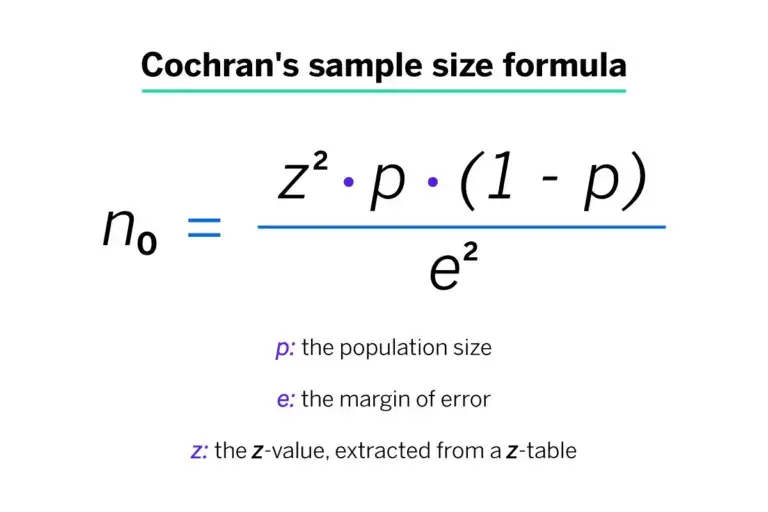

In [ ]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Paso 1: Cargar el archivo CSV
df = pd.read_csv('clases_limpio.csv')

# Paso 2: Filtrar las clases físicas (sin bonificaciones en INT, WIS, CHA)
clases_fisicas = df[(df['intelligence'] <= 0) & (df['wisdom'] <= 0) & (df['charisma'] <= 0)]

# Mostramos las clases físicas identificadas
print("Clases físicas identificadas:")
print(clases_fisicas[['character_class', 'strength', 'dexterity', 'constitution', 'intelligence', 'wisdom', 'charisma']])

# Paso 3: Definir la función para simular un combate entre dos clases
def simular_combate(clase1, clase2, num_simulaciones=10000, exportar_detalles=False):
    """
    Simula num_simulaciones combates entre clase1 y clase2
    Devuelve el porcentaje de victorias de cada clase

    Si exportar_detalles=True, guarda los detalles de cada combate
    """
    # Contadores para los resultados
    victorias_clase1 = 0
    victorias_clase2 = 0
    empates = 0

    # Lista para guardar la duración de cada combate
    duraciones = []

    # Lista para guardar detalles de cada combate si se solicita
    detalles_combates = []

    # Obtenemos las estadísticas de cada clase
    stats1 = df[df['character_class'] == clase1].iloc[0]
    stats2 = df[df['character_class'] == clase2].iloc[0]

    # Extraemos los valores relevantes para el combate
    hp1 = stats1['max_hp']
    hp2 = stats2['max_hp']
    ca1 = stats1['ac']
    ca2 = stats2['ac']
    ataque1 = stats1['attack_bonus']
    ataque2 = stats2['attack_bonus']

    # Extraemos el tipo de dado de daño de cada clase
    dado_dmg1 = int(stats1['dmg_main_hand_dice'].replace('d', ''))
    dado_dmg2 = int(stats2['dmg_main_hand_dice'].replace('d', ''))

    # Realizamos num_simulaciones combates
    for sim_id in range(num_simulaciones):
        # Reiniciamos los puntos de vida para cada nuevo combate
        hp1_actual = hp1
        hp2_actual = hp2

        # Contador de rondas del combate
        rondas = 0

        # Variables para seguimiento de estadísticas
        golpes_clase1 = 0
        golpes_clase2 = 0
        daño_total_clase1 = 0
        daño_total_clase2 = 0
        criticos_clase1 = 0
        criticos_clase2 = 0

        # El combate continúa mientras ambos tengan HP
        while hp1_actual > 0 and hp2_actual > 0:
            rondas += 1

            # TURNO DE CLASE 1
            # Tiramos un d20 para el ataque
            tirada1 = np.random.randint(1, 20)

            if tirada1 == 20:  # ¡Crítico! Golpe automático y daño doble
                dmg1 = np.random.randint(1, dado_dmg1) * 2
                hp2_actual -= dmg1
                golpes_clase1 += 1
                daño_total_clase1 += dmg1
                criticos_clase1 += 1
            elif tirada1 + ataque1 >= ca2:  # Golpe normal: tirada + bono >= CA
                dmg1 = np.random.randint(1, dado_dmg1)
                hp2_actual -= dmg1
                golpes_clase1 += 1
                daño_total_clase1 += dmg1

            # Si clase2 ya murió, terminamos esta ronda
            if hp2_actual <= 0:
                break

            # TURNO DE CLASE 2
            tirada2 = np.random.randint(1, 20)

            if tirada2 == 20:  # Crítico
                dmg2 = np.random.randint(1, dado_dmg2) * 2
                hp1_actual -= dmg2
                golpes_clase2 += 1
                daño_total_clase2 += dmg2
                criticos_clase2 += 1
            elif tirada2 + ataque2 >= ca1:  # Golpe normal
                dmg2 = np.random.randint(1, dado_dmg2)
                hp1_actual -= dmg2
                golpes_clase2 += 1
                daño_total_clase2 += dmg2

        # Guardamos la duración de este combate
        duraciones.append(rondas)

        # Determinamos el ganador
        ganador = "Empate"
        if hp1_actual <= 0 and hp2_actual <= 0:
            empates += 1
        elif hp1_actual <= 0:
            victorias_clase2 += 1
            ganador = clase2
        else:
            victorias_clase1 += 1
            ganador = clase1

        # Si se solicita, guardamos detalles de este combate
        if exportar_detalles:
            detalles_combates.append({
                'simulacion_id': sim_id + 1,
                'matchup': f"{clase1}_vs_{clase2}",
                'ganador': ganador,
                'duracion_rondas': rondas,
                'hp_final_' + clase1: hp1_actual,
                'hp_final_' + clase2: hp2_actual,
                'golpes_' + clase1: golpes_clase1,
                'golpes_' + clase2: golpes_clase2,
                'daño_total_' + clase1: daño_total_clase1,
                'daño_total_' + clase2: daño_total_clase2,
                'criticos_' + clase1: criticos_clase1,
                'criticos_' + clase2: criticos_clase2,
                'daño_por_ronda_' + clase1: daño_total_clase1 / rondas if rondas > 0 else 0,
                'daño_por_ronda_' + clase2: daño_total_clase2 / rondas if rondas > 0 else 0,
                'precision_' + clase1: golpes_clase1 / rondas if rondas > 0 else 0,
                'precision_' + clase2: golpes_clase2 / rondas if rondas > 0 else 0
            })

    # Calculamos porcentajes y estadísticas
    resultado = {
        'victorias_clase1': victorias_clase1 / num_simulaciones,
        'victorias_clase2': victorias_clase2 / num_simulaciones,
        'empates': empates / num_simulaciones,
        'rondas_promedio': np.mean(duraciones),
        'max_rondas': np.max(duraciones),
        'min_rondas': np.min(duraciones)
    }

    # Si se solicitó exportar detalles, creamos un DataFrame y lo guardamos
    if exportar_detalles and detalles_combates:
        df_detalles = pd.DataFrame(detalles_combates)
        return resultado, df_detalles

    return resultado

# Paso 4: Función para determinar el número óptimo de simulaciones con todas las clases
def analizar_convergencia():
    """
    Analiza cómo los resultados convergen al aumentar el número de simulaciones
    para todas las clases físicas
    """
    # Vamos a probar varios números de simulaciones
    nums_simulaciones = [100, 500, 1000, 2500, 5000, 10000]

    # Obtenemos la lista de clases físicas
    clases = clases_fisicas['character_class'].tolist()

    # Para cada número de simulaciones, simularemos todos los enfrentamientos
    # y guardaremos los resultados por clase
    resultados_por_clase = {clase: [] for clase in clases}

    print("Analizando convergencia para todas las clases físicas...")

    for n in nums_simulaciones:
        print(f"\nProbando con {n} simulaciones...")

        # Diccionario para acumular victorias por clase
        victorias_acumuladas = {clase: 0 for clase in clases}
        total_combates = {clase: 0 for clase in clases}

        # Simulamos todos los enfrentamientos posibles
        for i, clase1 in enumerate(clases):
            for j, clase2 in enumerate(clases):
                if clase1 == clase2:
                    continue  # Saltamos los combates contra sí mismo

                print(f"  {clase1} vs {clase2}...", end="")
                resultado = simular_combate(clase1, clase2, n)
                print(" Listo!")

                # Acumulamos las victorias
                victorias_acumuladas[clase1] += resultado['victorias_clase1'] * n
                victorias_acumuladas[clase2] += resultado['victorias_clase2'] * n

                # Contamos el total de combates por clase
                total_combates[clase1] += n
                total_combates[clase2] += n

        # Calculamos el porcentaje de victorias por clase
        for clase in clases:
            if total_combates[clase] > 0:
                tasa_victoria = victorias_acumuladas[clase] / total_combates[clase]
                resultados_por_clase[clase].append({
                    'num_simulaciones': n,
                    'tasa_victoria': tasa_victoria
                })

    # Convertimos a DataFrame para la visualización
    df_convergencia = {clase: pd.DataFrame(datos) for clase, datos
                       in resultados_por_clase.items()}

    # Graficamos la convergencia para todas las clases
    plt.figure(figsize=(12, 8))

    for clase, datos in df_convergencia.items():
        plt.plot(datos['num_simulaciones'], datos['tasa_victoria'],
                 'o-', label=f'{clase}')

    plt.xlabel('Número de simulaciones por enfrentamiento')
    plt.ylabel('Tasa de victoria promedio')
    plt.title('Convergencia de resultados para todas las clases físicas')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Calculamos las variaciones para determinar el número óptimo
    variaciones = []

    # Para cada clase, calculamos la variación entre puntos consecutivos
    for clase, datos in df_convergencia.items():
        for i in range(1, len(datos)):
            var = abs(datos['tasa_victoria'].iloc[i] - datos['tasa_victoria'].iloc[i-1])
            variaciones.append(var)

    # Promediamos las variaciones para cada número de simulaciones
    variacion_promedio = []
    for i in range(1, len(nums_simulaciones)):
        vars_para_n = variaciones[(i-1)*len(clases):i*len(clases)]
        variacion_promedio.append(sum(vars_para_n) / len(vars_para_n))

    # Si la variación promedio es menor a 1%, consideramos que ha convergido
    for i, var in enumerate(variacion_promedio):
        if var < 0.01:
            num_recomendado = nums_simulaciones[i+1]
            print(f"\nRecomendación: {num_recomendado} simulaciones son suficientes")
            print(f"La variación promedio es de solo {var*100:.2f}% respecto a la anterior")
            return num_recomendado

    # Si no converge, recomendamos el máximo probado
    print(f"\nRecomendación: usar {nums_simulaciones[-1]} simulaciones o más")
    print("No se alcanzó una convergencia clara con las simulaciones realizadas.")
    return nums_simulaciones[-1]

Clases físicas identificadas:
  character_class  strength  dexterity  constitution  intelligence  wisdom  \
3         fighter         1          1             1             0       0   
4       barbarian         3         -2             1             0       0   
5          knight         1         -2             3             0       0   
9        wanderer         1          2             0             0       0   

   charisma  
3         0  
4         0  
5         0  
9         0  


---
# 🧪🥼🔬Model Simulation and Validation
---

Paso 1: Análisis de convergencia para determinar número óptimo de simulaciones
Analizando convergencia para todas las clases físicas...

Probando con 100 simulaciones...
  fighter vs barbarian... Listo!
  fighter vs knight... Listo!
  fighter vs wanderer... Listo!
  barbarian vs fighter... Listo!
  barbarian vs knight... Listo!
  barbarian vs wanderer... Listo!
  knight vs fighter... Listo!
  knight vs barbarian... Listo!
  knight vs wanderer... Listo!
  wanderer vs fighter... Listo!
  wanderer vs barbarian... Listo!
  wanderer vs knight... Listo!

Probando con 500 simulaciones...
  fighter vs barbarian... Listo!
  fighter vs knight... Listo!
  fighter vs wanderer... Listo!
  barbarian vs fighter... Listo!
  barbarian vs knight... Listo!
  barbarian vs wanderer... Listo!
  knight vs fighter... Listo!
  knight vs barbarian... Listo!
  knight vs wanderer... Listo!
  wanderer vs fighter... Listo!
  wanderer vs barbarian... Listo!
  wanderer vs knight... Listo!

Probando con 1000 simulacio

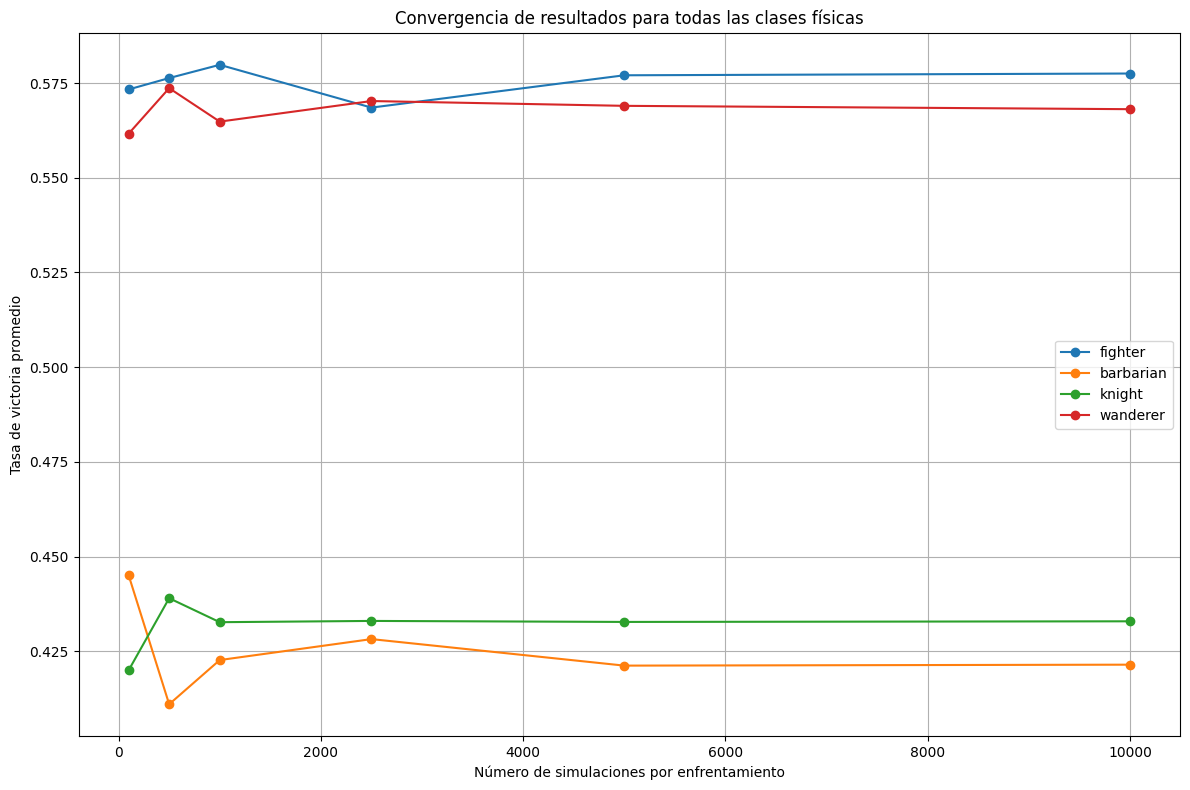


Recomendación: 500 simulaciones son suficientes
La variación promedio es de solo 0.66% respecto a la anterior

Paso 2: Simulando todos los combates con 500 simulaciones por combate
Simulando: fighter vs barbarian...
Simulando: fighter vs knight...
Simulando: fighter vs wanderer...
Simulando: barbarian vs fighter...
Simulando: barbarian vs knight...
Simulando: barbarian vs wanderer...
Simulando: knight vs fighter...
Simulando: knight vs barbarian...
Simulando: knight vs wanderer...
Simulando: wanderer vs fighter...
Simulando: wanderer vs barbarian...
Simulando: wanderer vs knight...

Matriz de victorias:
(Filas: clase atacante, Columnas: clase defensora)
Los valores representan el % de victorias de la clase en la FILA cuando se enfrenta a la clase en la COLUMNA
           fighter  barbarian  knight  wanderer
fighter      0.500      0.640   0.638     0.556
barbarian    0.442      0.500   0.546     0.438
knight       0.426      0.548   0.500     0.474
wanderer     0.508      0.654   0.67

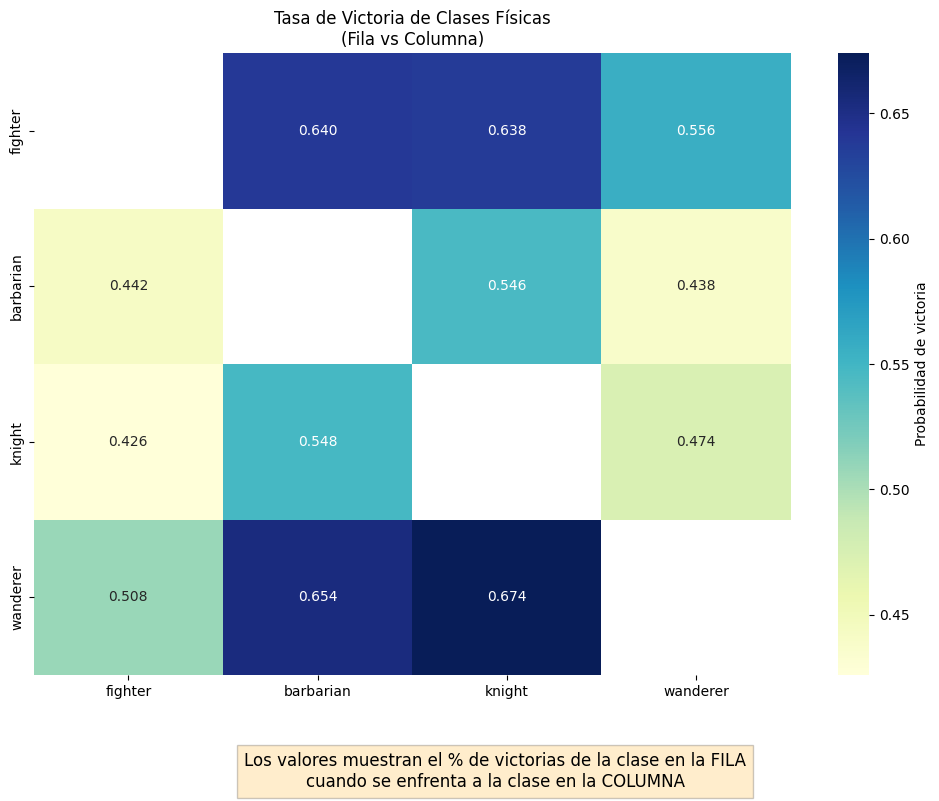

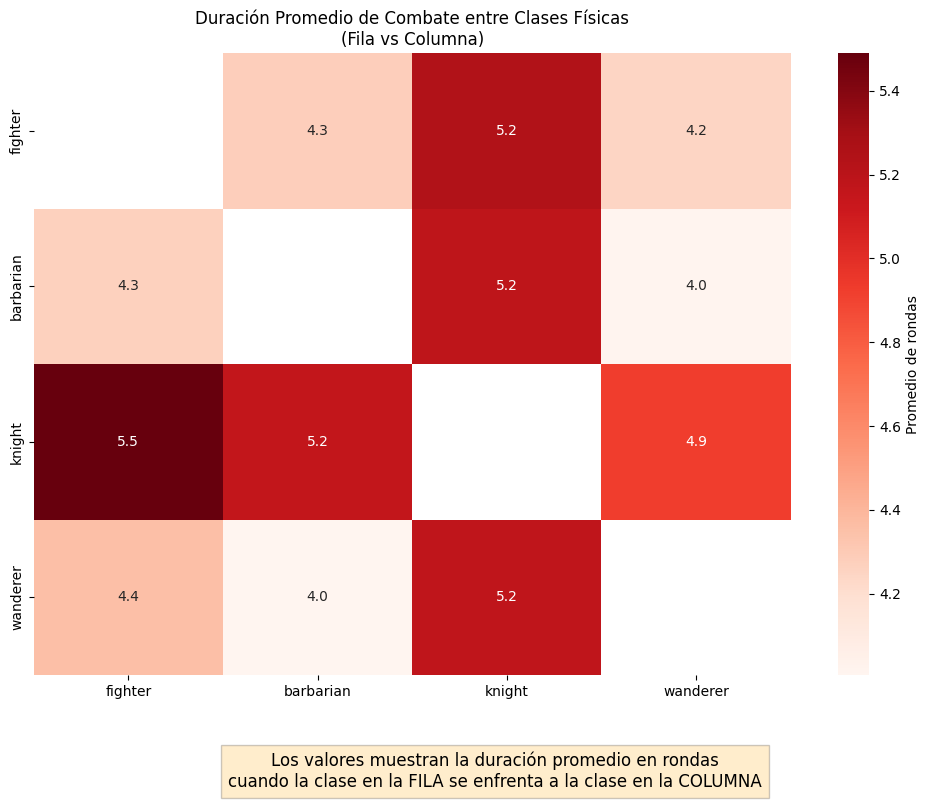


¡Análisis completo!


In [ ]:
# Paso 5: Simular todos los combates entre clases físicas
def simular_todos_combates(num_simulaciones=10000):
    """
    Simula todos los combates posibles entre las clases físicas
    y muestra los resultados en forma de matriz
    """
    clases = clases_fisicas['character_class'].tolist()

    # Creamos matrices vacías para guardar resultados
    matriz_victorias = pd.DataFrame(0.0, index=clases, columns=clases)
    matriz_rondas = pd.DataFrame(0.0, index=clases, columns=clases)

    # Creamos un DataFrame para resumen de resultados
    resumen_combates = []

    # Para cada par de clases, simulamos el combate
    for i, clase1 in enumerate(clases):
        for j, clase2 in enumerate(clases):
            if clase1 == clase2:
                # Una clase contra sí misma siempre tiene 50% de probabilidad
                matriz_victorias.loc[clase1, clase2] = 0.5
                matriz_rondas.loc[clase1, clase2] = np.nan
                continue

            print(f"Simulando: {clase1} vs {clase2}...")
            resultado = simular_combate(clase1, clase2, num_simulaciones)

            # Guardamos el porcentaje de victorias de clase1 contra clase2
            matriz_victorias.loc[clase1, clase2] = resultado['victorias_clase1']

            # Guardamos el promedio de rondas que duró el combate
            matriz_rondas.loc[clase1, clase2] = resultado['rondas_promedio']

            # Agregamos al resumen
            resumen_combates.append({
                'clase1': clase1,
                'clase2': clase2,
                'victorias_clase1': resultado['victorias_clase1'],
                'victorias_clase2': resultado['victorias_clase2'],
                'empates': resultado['empates'],
                'rondas_promedio': resultado['rondas_promedio'],
                'max_rondas': resultado['max_rondas'],
                'min_rondas': resultado['min_rondas']
            })

    # Convertimos el resumen a DataFrame
    df_resumen = pd.DataFrame(resumen_combates)

    # Mostramos las matrices de resultados
    print("\nMatriz de victorias:")
    print("(Filas: clase atacante, Columnas: clase defensora)")
    print("Los valores representan el % de victorias de la clase en la FILA cuando se enfrenta a la clase en la COLUMNA")
    print(matriz_victorias)

    print("\nMatriz de duración promedio de combate (rondas):")
    print(matriz_rondas)

    # Graficamos la matriz de victorias con etiquetas claras
    plt.figure(figsize=(10, 8))
    mask = np.zeros_like(matriz_victorias, dtype=bool)
    np.fill_diagonal(mask, True)  # Mascara para la diagonal

    ax = sns.heatmap(matriz_victorias, annot=True, cmap="YlGnBu", fmt=".3f",
                   cbar_kws={'label': 'Probabilidad de victoria'}, mask=mask)
    plt.title('Tasa de Victoria de Clases Físicas\n(Fila vs Columna)')

    # Añadimos etiquetas aclaratorias
    plt.figtext(0.5, 0.01,
                "Los valores muestran el % de victorias de la clase en la FILA\ncuando se enfrenta a la clase en la COLUMNA",
                ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)  # Hacer espacio para el texto
    plt.show()

    # Graficamos la matriz de rondas
    plt.figure(figsize=(10, 8))

    ax = sns.heatmap(matriz_rondas, annot=True, cmap="Reds", fmt=".1f",
                   cbar_kws={'label': 'Promedio de rondas'}, mask=mask)

    plt.title('Duración Promedio de Combate entre Clases Físicas\n(Fila vs Columna)')

    # Añadimos etiquetas aclaratorias
    plt.figtext(0.5, 0.01,
                "Los valores muestran la duración promedio en rondas\ncuando la clase en la FILA se enfrenta a la clase en la COLUMNA",
                ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)  # Hacer espacio para el texto
    plt.show()

    return matriz_victorias, matriz_rondas, df_resumen

# Paso 6: Ejecutar el análisis completo
if __name__ == "__main__":
    # Primero analizamos cuántas simulaciones necesitamos
    print("Paso 1: Análisis de convergencia para determinar número óptimo de simulaciones")
    num_simulaciones = analizar_convergencia()

    # Luego simulamos todos los combates con ese número
    print(f"\nPaso 2: Simulando todos los combates con {num_simulaciones} simulaciones por combate")
    matriz_victorias, matriz_rondas, resumen = simular_todos_combates(num_simulaciones)

    print("\n¡Análisis completo!")

In [ ]:
# Función para descargar todos los datos de simulaciones
def descargar_datos_simulaciones(path=None):
    """
    Carga y prepara para descarga el CSV con todos los resultados
    de las simulaciones de combate.

    Si path es None, busca el archivo más reciente en el directorio actual.
    """
    import os
    import pandas as pd
    from google.colab import files

    # Si no se proporciona una ruta, buscar el archivo más reciente
    if path is None:
        # Buscar todas las carpetas de resultados
        directorios = [d for d in os.listdir() if d.startswith("resultados_simulacion_")]

        if not directorios:
            print("No se encontraron carpetas de resultados de simulación.")
            return

        # Ordenar por fecha (más reciente primero)
        directorios.sort(reverse=True)

        # Buscar el archivo de todos los combates en la carpeta más reciente
        path = f"{directorios[0]}/todos_los_combates.csv"

        if not os.path.exists(path):
            print(f"No se encontró el archivo de resultados en {path}")
            return

    try:
        # Cargar los datos
        print(f"Cargando datos desde {path}...")
        df = pd.read_csv(path)

        # Mostrar información básica
        print(f"Datos cargados: {len(df)} filas y {len(df.columns)} columnas")
        print("\nPrimeras 5 filas:")
        print(df.head())

        # Estadísticas básicas
        print("\nDistribución de combates por matchup:")
        matchups = df['matchup'].value_counts()
        print(matchups)

        print("\nPreparando archivo para descarga...")

        # Guardar temporalmente para descarga
        temp_file = "datos_simulaciones_temp.csv"
        df.to_csv(temp_file, index=False)

        # Descargar archivo
        files.download(temp_file)
        print(f"\n✅ Archivo descargado como '{temp_file}'")

    except Exception as e:
        print(f"Error al procesar el archivo: {e}")

# Ejemplo de uso:
# descargar_datos_simulaciones()  # Automáticamente usa el archivo más reciente
# descargar_datos_simulaciones("resultados_simulacion_20250503_123456/todos_los_combates.csv")  # Ruta específica

#Eventualmenté haré un gráfico de barras apiladas horizontales de valores como porcentaje

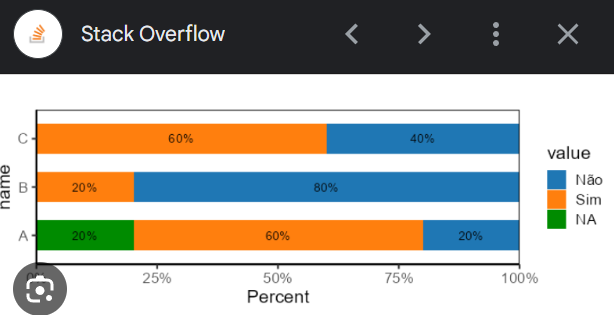

---
## 🧙📊✨SQL Magic✨📊🧙
---
 %%sql

 https://trvrm.github.io/sql-magic.html